In [158]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_profiling import ProfileReport

## 1. EDA/GEDA

In [215]:
c5 = pd.read_csv('incidentes-viales-c5.csv')

In [3]:
c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1


In [4]:
len(c5.columns)

18

In [5]:
len(c5)

1383138

In [6]:
c5.nunique()

folio                1383138
fecha_creacion          2637
hora_creacion         105887
dia_semana                 7
codigo_cierre              5
fecha_cierre            2621
año_cierre                 7
mes_cierre                12
hora_cierre           106827
delegacion_inicio         16
incidente_c4              26
latitud                82501
longitud               78984
clas_con_f_alarma          4
tipo_entrada               9
delegacion_cierre         16
geopoint              134288
mes                       12
dtype: int64

In [7]:
c5.dtypes

folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object

### 2.1 Data Profiling

In [8]:
#variables numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nc5 = c5.select_dtypes(include=numerics)
print('Son ' + str(nc5.shape[1]) + ' variables numericas')

Son 4 variables numericas


In [9]:
profile = ProfileReport(c5, title = "Profiling")
profile.to_file("./data-profiling.html")
profile.to_widgets()

In [10]:
def data_profiling(dataframe):
    """
    Crea el data profiling de variables numericas y categoricas
    """
    
    # Primero asignamos un data frame con los nombres de las columnas que saldran
    df_num = pd.DataFrame(columns = ['tipo_de_dato','observaciones','media','cuantil_25',
                                   'cuantil_50','cuantil_75','valor_max','valor_min',
                                   'observaciones_unicas','top_1','top_2','top_3','numero_de_nan'])
    df_cat = pd.DataFrame(columns = ['n_de_categorias','moda','top_1','top_2','top_3','numero_de_nan'])
    
    
    # Hacemos un loop para que itere sobre las columnas del data frame
    for columna in dataframe:
        
        # Condicional para datos numericos
        if pd.api.types.is_numeric_dtype(dataframe[columna]):
            # Estadisticos
            tipo_de_dato = dataframe[columna].dtype 
            obs = len(dataframe[columna])
            std = dataframe[columna].std()
            media = dataframe[columna].mean()
            cuantil_25 = dataframe[columna].quantile(.25)
            cuantil_50 = dataframe[columna].quantile(.5)
            cuantil_75 = dataframe[columna].quantile(.75)
            maximo = dataframe[columna].max()
            minimo = dataframe[columna].min()
            obs_unic = dataframe[columna].nunique()
            num_de_nan = dataframe[columna].isna().sum()
            # Top 3
            if dataframe[columna].nunique() >= 3:
                top_3= dataframe.groupby([columna])[columna].count().sort_values(ascending = False).head(3)
                top_1 = top_3.index[0]
                top_2 = top_3.index[1]
                top_3 = top_3.index[2]
            else:
                top_3 = dataframe.groupby([columna])[columna].count().sort_values(ascending = False).head(3)
                top_1 = top_3.index[0]
                top_2 = top_3.index[0]
                top_3 = top_3.index[0]
                
            # Asignamos los estadisticos a las columnas
            datos = {'tipo_de_dato':tipo_de_dato,'observaciones':obs,'media':media,
                    'cuantil_25':cuantil_25,'cuantil_50':cuantil_50,'cuantil_75':cuantil_75,
                    'valor_max':maximo,'valor_min':minimo,'observaciones_unicas':obs_unic,
                    'top_1':top_1,'top_2':top_2,'top_3':top_3,'numero_de_nan':num_de_nan}
            
            # Los vamos agregando a un nuevo data frame 
            df1 = pd.DataFrame(datos, index = [columna])
            df_num = df_num.append(df1)
        
        # Condicional para los categoricos    
        else:
            # Estadisticos
            num_cat = dataframe[columna].nunique()
            moda = dataframe[columna].mode(dropna=True)[0]
            num_de_nan = dataframe[columna].isna().sum()
            # Top 3
            if dataframe[columna].nunique() >= 3:
                top_3= dataframe.groupby([columna])[columna].count().sort_values(ascending = False).head(3)
                top_1 = top_3.index[0]
                top_2 = top_3.index[1]
                top_3 = top_3.index[2]
            else:
                top_3 = dataframe.groupby([columna])[columna].count().sort_values(ascending = False).head(3)
                top_1 = top_3.index[0]
                top_2 = top_3.index[0]
                top_3 = top_3.index[0]
                
            # Asignamos estadisticos a columnas
            datos = {'n_de_categorias':num_cat,'moda':moda,'top_1':top_1,'top_2':top_2,
                     'top_3':top_3,'numero_de_nan':num_de_nan}
            
            # Los vamos agregando a un nuevo data frame
            df1 = pd.DataFrame(datos, index = [columna])
            df_cat = df_cat.append(df1)
            
    # Regresa dos bases una para las variables numericas y otro para variables categoricas
    return df_num, df_cat

In [11]:
numerico, categorico = data_profiling(c5)

In [12]:
display(numerico)

,tipo_de_dato,observaciones,media,cuantil_25,cuantil_50,cuantil_75,valor_max,valor_min,observaciones_unicas,top_1,top_2,top_3,numero_de_nan
año_cierre,int64,1383138,2017.022848,2015.00000,2017.00000,2019.00000,2020,2014,7,2018,2019,2017,0
latitud,float64,1383138,19.383909,19.33685,19.38408,19.43496,195.303,19.094,82501,19.3043,19.3717,19.347,443
longitud,float64,1383138,-99.143590,-99.17930,-99.14023,-99.09600,-98.9454,-991.764,78984,-99.0802,-99.0871,-99.1806,435
mes,int64,1383138,6.617056,4.00000,7.00000,10.00000,12,1,12,10,8,9,0


In [13]:
# Número de categorías, moda, top 3 y valores faltantes
display(categorico)

,n_de_categorias,moda,top_1,top_2,top_3,numero_de_nan
folio,1383138,AO/140101/01144,IZ/201031/08550,C5/160812/06089,C5/160812/05979,0
fecha_creacion,2637,14/02/2020,14/02/2020,26/10/2018,30/11/2019,0
hora_creacion,105887,20:44:00,20:44:00,19:16:00,18:38:00,0
dia_semana,7,Viernes,Viernes,Sábado,Jueves,0
codigo_cierre,5,(A) La unidad de atención a emergencias fue de...,(A) La unidad de atención a emergencias fue de...,(D) El incidente reportado se registró en dos ...,(N) La unidad de atención a emergencias fue de...,0
fecha_cierre,2621,14/02/2020,14/02/2020,08/12/2017,02/12/2017,0
mes_cierre,12,Octubre,Octubre,Agosto,Septiembre,0
hora_cierre,106827,21:59:00,21:59:00,21:52:00,21:58:00,0
delegacion_inicio,16,IZTAPALAPA,IZTAPALAPA,GUSTAVO A. MADERO,CUAUHTEMOC,158
incidente_c4,26,accidente-choque sin lesionados,accidente-choque sin lesionados,accidente-choque con lesionados,lesionado-atropellado,0


In [14]:
# Valor de las categorías
c5.año_cierre.unique()

array([2016, 2017, 2018, 2019, 2015, 2020, 2014])

In [15]:
c5.mes.unique()

array([ 1,  2,  3,  9, 10,  5,  6,  4,  8, 12,  7, 11])

In [16]:
c5.dia_semana.unique()

array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [17]:
c5.codigo_cierre.unique()

array(['(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada',
       '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad',
       '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente',
       '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente',
       '(I) El incidente reportado es afirmativo y se añade información adicional al evento'],
      dtype=object)

In [18]:
c5.delegacion_inicio.unique()

array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
       'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
       'TLAHUAC', 'CUAUHTEMOC', 'COYOACAN', 'IZTAPALAPA', 'BENITO JUAREZ',
       'AZCAPOTZALCO', 'IZTACALCO', 'MILPA ALTA', 'ALVARO OBREGON',
       'XOCHIMILCO', nan], dtype=object)

In [19]:
c5.incidente_c4.unique()

array(['accidente-choque sin lesionados',
       'accidente-choque con lesionados',
       'lesionado-accidente automovilístico', 'accidente-volcadura',
       'lesionado-atropellado', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'accidente-motociclista', 'accidente-vehiculo desbarrancado',
       'accidente-choque con prensados', 'accidente-vehiculo atrapado',
       'accidente-ciclista', 'accidente-monopatín',
       'sismo-choque con lesionados',
       'accidente-vehículo atrapado-varado',
       'detención ciudadana-atropellado', 'accidente-ferroviario',
       'detención ciudadana-accidente automovilístico',
       'sismo-choque sin lesionados', 'sismo-persona atropellada',
       'sismo-choque con prensados',
       'Detención ciudadana-accidente automovilístico',
       'mi ciudad-calle-incidente de tránsito',
       'mi ciudad-taxi-incidente de tránsito'], dtype=object)

In [20]:
c5.clas_con_f_alarma.unique()

array(['EMERGENCIA', 'URGENCIAS MEDICAS', 'FALSA ALARMA', 'DELITO'],
      dtype=object)

In [21]:
c5.tipo_entrada.unique()

array(['BOTÓN DE AUXILIO', 'LLAMADA DEL 066', 'RADIO', 'CÁMARA', 'REDES',
       'LLAMADA DEL 911', 'LLAMADA APP911', 'ZELLO', 'APLICATIVOS'],
      dtype=object)

In [22]:
c5.delegacion_cierre.unique()

array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
       'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
       'TLAHUAC', 'ALVARO OBREGON', 'CUAUHTEMOC', 'COYOACAN',
       'IZTAPALAPA', 'BENITO JUAREZ', 'AZCAPOTZALCO', 'IZTACALCO',
       'MILPA ALTA', 'XOCHIMILCO', nan], dtype=object)

In [23]:
# Número de observaciones por categoría y proporción de observaciones por categoría. 

def num_prop(df,column_data):
    # Número de observaciones por categoría
    num=pd.value_counts(df[column_data]) 
    # Proporción de observaciones por categoría
    prop=100 * df[column_data].value_counts() / len(df[column_data])
    # Unión de columnas en una y renombramiento
    columnas_num_prop = round(pd.concat([num, prop], 
                                        keys=['num_obs_cat', 'prop_obs_cat'],
                                        axis=1),2)
    
    return columnas_num_prop

In [24]:
num_prop(c5,'mes')

,num_obs_cat,prop_obs_cat
10,133641,9.66
8,121123,8.76
9,120581,8.72
3,120335,8.70
12,117616,8.50
2,115988,8.39
11,115055,8.32
6,111782,8.08
7,109880,7.94
5,108590,7.85


In [27]:
num_prop(c5,'delegacion_inicio')

,num_obs_cat,prop_obs_cat
IZTAPALAPA,223687,16.17
GUSTAVO A. MADERO,144620,10.46
CUAUHTEMOC,141391,10.22
MIGUEL HIDALGO,115864,8.38
COYOACAN,110146,7.96
BENITO JUAREZ,104322,7.54
ALVARO OBREGON,102071,7.38
VENUSTIANO CARRANZA,94393,6.82
TLALPAN,87339,6.31
AZCAPOTZALCO,60823,4.40


In [28]:
c5.groupby(['delegacion_inicio']).count()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
delegacion_inicio,,,,,,,,,,,,,,,,,
ALVARO OBREGON,102071,102071,102071,102071,102071,102071,102071,102071,102071,102071,102049,102049,102071,102071,102071,102049,102071
AZCAPOTZALCO,60823,60823,60823,60823,60823,60823,60823,60823,60823,60823,60808,60811,60823,60823,60823,60808,60823
BENITO JUAREZ,104322,104322,104322,104322,104322,104322,104322,104322,104322,104322,104302,104301,104322,104322,104322,104301,104322
COYOACAN,110146,110146,110146,110146,110146,110146,110146,110146,110146,110146,110119,110119,110146,110146,110146,110119,110146
CUAJIMALPA,26714,26714,26714,26714,26714,26714,26714,26714,26714,26714,26707,26707,26714,26714,26714,26707,26714
CUAUHTEMOC,141391,141391,141391,141391,141391,141391,141391,141391,141391,141391,141322,141326,141391,141391,141391,141322,141391
GUSTAVO A. MADERO,144620,144620,144620,144620,144620,144620,144620,144620,144620,144620,144576,144575,144620,144620,144620,144575,144620
IZTACALCO,58567,58567,58567,58567,58567,58567,58567,58567,58567,58567,58554,58555,58567,58567,58567,58554,58567
IZTAPALAPA,223687,223687,223687,223687,223687,223687,223687,223687,223687,223687,223603,223604,223687,223687,223687,223602,223687


In [29]:
list(c5.columns)

['folio',
 'fecha_creacion',
 'hora_creacion',
 'dia_semana',
 'codigo_cierre',
 'fecha_cierre',
 'año_cierre',
 'mes_cierre',
 'hora_cierre',
 'delegacion_inicio',
 'incidente_c4',
 'latitud',
 'longitud',
 'clas_con_f_alarma',
 'tipo_entrada',
 'delegacion_cierre',
 'geopoint',
 'mes']

In [30]:
geo = c5.geopoint.str.split(",", n=1, expand = True)
geo

,0,1
0,19.422113,-99.084643
1,19.35832,-99.297641
2,19.21707,-99.21907008
3,19.32057999,-99.24100992
4,19.45289997,-99.21587004
...,...,...
1383133,19.55023002,-99.15171012
1383134,19.44378,-99.13695984
1383135,19.34631,-99.1449
1383136,19.36755999,-99.05645016


Tabla de data profiling para las columnas numéricas. Explica las 3 cosas más relevantes.

Tabla de data profiling para las columnas categóricas. Explica las 3 cosas más relevantes.

In [32]:
#Las variables año y mes de cierre corresponden a la informacion de fecha de cierre?

Tabla de data profiling para las columnas de fecha. Explica las 3 cosas más relevantes.

In [33]:
#Al leer la data, los datos se transforman correctamente o tenemos alguna fecha irregular?
#Cual es el tiempo que tardan en cerrar un incidente?
#Que porcentaje de los incidentes se reportan y cierran en el mismo año?

Tabla de data profiling para las columnas geoespaciales. Explica las 3 cosas más relevantes.

In [31]:
#Latitud & Altitud es igual a GeoPoint?

### 2.2 GEDA (Maximo 10 Graficas)

In [216]:
# Crear variable de incidentes_reales
row_indexes=c5[c5['codigo_cierre']=='(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada'].index
c5.loc[row_indexes,'incidente_real']="1"
c5['incidente_real'] = c5['incidente_real'].replace(np.nan, '-1')

In [217]:
# Crear variable de incidentes_reales_aux para uso del mapa
row_indexes_aux=c5[c5['codigo_cierre']=='(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada'].index
c5.loc[row_indexes_aux,'incidente_real_aux']='red'
c5['incidente_real_aux'] = c5['incidente_real_aux'].replace(np.nan, 'blue')

In [218]:
c5['fecha_creacion']

0          23/01/2016
1          23/01/2016
2          24/01/2016
3          24/01/2016
4          24/01/2016
              ...    
1383133    31/10/2020
1383134    31/10/2020
1383135    31/10/2020
1383136    31/10/2020
1383137    31/10/2020
Name: fecha_creacion, Length: 1383138, dtype: object

In [203]:
c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,incidente_real,incidente_real_aux
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,1,1.0
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,1,1.0
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,-1,-1.0
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,-1,-1.0
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,1,1.0


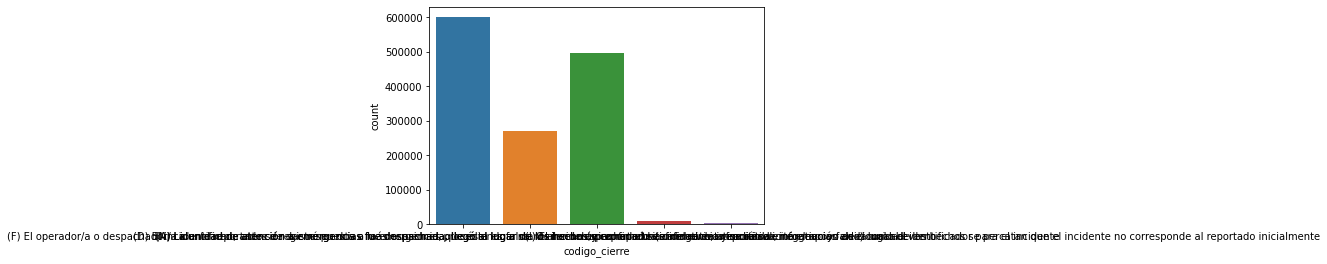

In [151]:
plt1 = sns.countplot(x="codigo_cierre",data=c5)
#ticks = plt1.axes[0][0].get_xticks()
#ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks]
#plt1.axes[0][0]#.get_xticks()

<AxesSubplot:xlabel='count', ylabel='codigo_cierre'>

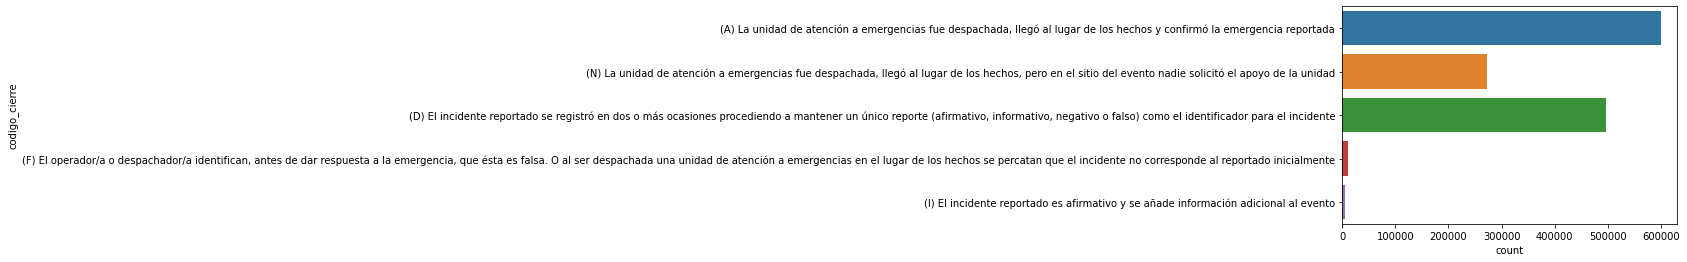

In [95]:
sns.countplot(y="codigo_cierre",data=c5)

<AxesSubplot:xlabel='año_cierre', ylabel='count'>

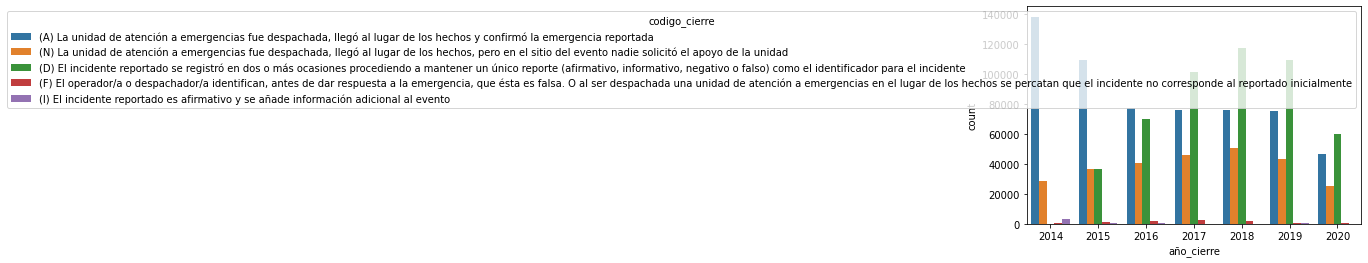

In [93]:
sns.countplot(x="año_cierre",hue='codigo_cierre',data=c5)

<AxesSubplot:xlabel='incidente_real', ylabel='count'>

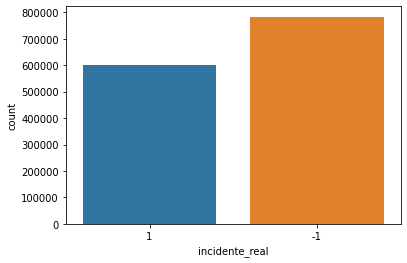

In [96]:
sns.countplot(x="incidente_real",data=c5)

<AxesSubplot:xlabel='año_cierre', ylabel='count'>

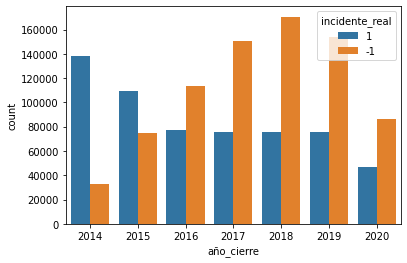

In [94]:
sns.countplot(x="año_cierre",hue='incidente_real',data=c5)

In [133]:
#pd.crosstab(c5['incidente_c4'],c5['incidente_real'],dropna=False,normalize='index')

<AxesSubplot:xlabel='incidente_real', ylabel='incidente_c4'>

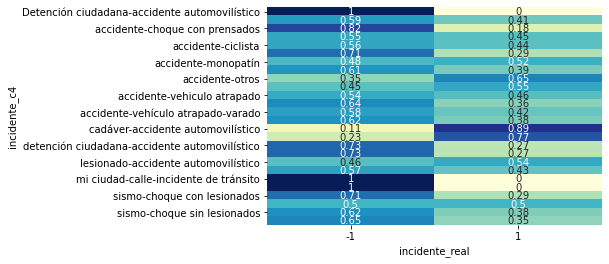

In [132]:
sns.heatmap(pd.crosstab(c5['incidente_c4'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

<AxesSubplot:xlabel='incidente_real', ylabel='tipo_entrada'>

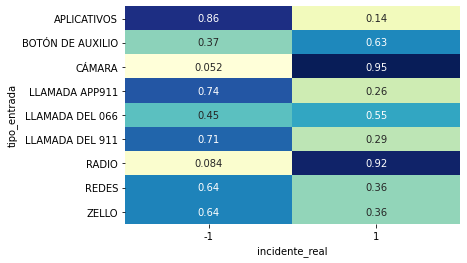

In [131]:
sns.heatmap(pd.crosstab(c5['tipo_entrada'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

### Comportamiento por colonia

<AxesSubplot:xlabel='delegacion_cierre', ylabel='delegacion_inicio'>

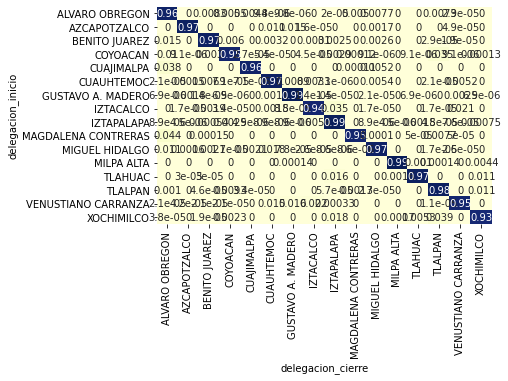

In [139]:
sns.heatmap(pd.crosstab(c5['delegacion_inicio'],c5['delegacion_cierre'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

<AxesSubplot:xlabel='count', ylabel='delegacion_inicio'>

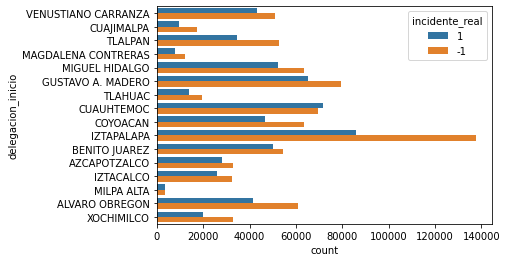

In [142]:
sns.countplot(y='delegacion_inicio',hue="incidente_real",data=c5)

<AxesSubplot:xlabel='incidente_real', ylabel='delegacion_inicio'>

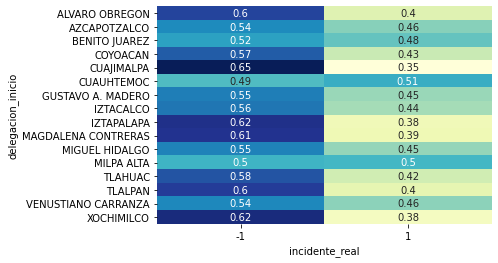

In [143]:
sns.heatmap(pd.crosstab(c5['delegacion_inicio'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

In [ ]:
analisis por dia de la semana

<AxesSubplot:xlabel='dia_semana', ylabel='count'>

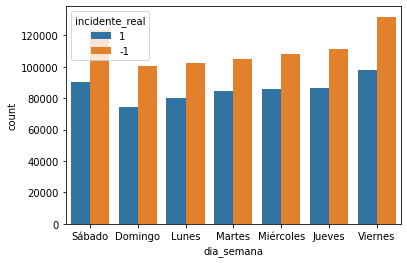

In [145]:
sns.countplot(x="dia_semana",hue='incidente_real',data=c5)

<AxesSubplot:xlabel='incidente_real', ylabel='dia_semana'>

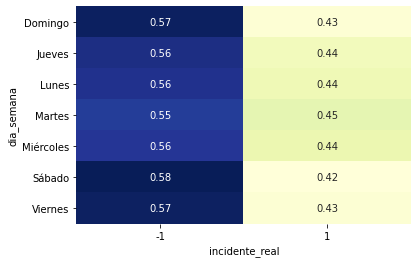

In [146]:
sns.heatmap(pd.crosstab(c5['dia_semana'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

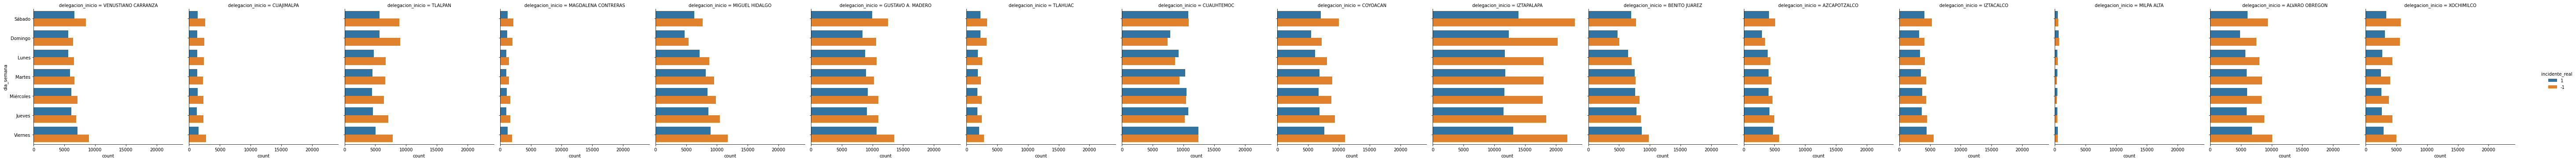

In [148]:
sns.catplot(y='dia_semana',hue='incidente_real',col='delegacion_inicio',
            data=c5,kind='count')

In [ ]:
agregar mapa y listo

In [ ]:
analisis por hora del dia
agregar gráfica de tiempo en que tardan en responder

**falta convertir adecuadamente las columnas de fecha**

In [ ]:
agregar titulos
modificar unidades en que se presentan

In [37]:
##consu_alca_tot = pd.DataFrame(c5,
##                      columns=['delegacion_inicio',
##                              'incidente_c4',
##                               'clas_con_f_alarma',
##                               'tipo_entrada'])\
##.groupby(['delegacion_inicio'], as_index=False).sum()#\
#.sort_values(by=['consumo_prom'], ascending=False)\
#.melt(id_vars='delegacion_inicio')



In [38]:
##sns.set(style='whitegrid',rc={'figure.figsize':(8,11)},palette='crest')
##plt1 = sns.barplot(x="value", y="alcaldia", 
##            data=consu_alca_tot, hue = 'variable')
##plt1.set(xlabel='Consumo Agua m3')
##plt.show()

In [ ]:
##c5.dtypes

In [ ]:
# Mapa

In [182]:
c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,incidente_real
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,-1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,-1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,1


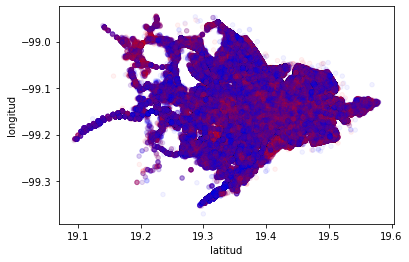

In [222]:
c5.plot(kind="scatter",x='latitud',y='longitud',c='incidente_real_aux',
        alpha=0.05)
plt.show()

In [190]:
##data=c5.copy()

In [191]:
##data.groupby('delegacion_inicio')['folio'].nunique()
##data_map=data[data.delegacion_inicio=="MIGUEL HIDALGO"]

In [206]:
##fig = px.scatter_mapbox(data_map, lat="latitud", lon="longitud",color="incidente_real",color_continuous_scale=px.colors.cyclical.IceFire)
##                        , size_max=15, zoom=3)
##fig.update_layout(mapbox_style="open-street-map")
##fig.show()

In [ ]:
##data=data.assign(count=1)

In [ ]:
##pivot_1=data[['count','dia_semana','clas_con_f_alarma']].groupby(['clas_con_f_alarma','dia_semana']).sum().reset_index()

In [ ]:
##sns.barplot(x="count", y="clas_con_f_alarma", data=pivot_1)

### 3 Transformacion de variables

In [172]:
c5['folio'] = c5.folio.astype('str')
#c5['fecha_creacion'] = c5.fecha_creacion.astype('date')
#c5['hora_creacion'] = c5.hora_creacion.astype('date')
c5['dia_semana'] = c5.dia_semana.astype('category')
c5['codigo_cierre'] = c5.codigo_cierre.astype('str')
#c5['fecha_cierre'] = c5.fecha_cierre.astype('date')
#c5['mes_cierre'] = c5.mes_cierre.astype('int')
#c5['hora_cierre'] = c5.hora_cierre.astype('time')
c5['delegacion_inicio'] = c5.delegacion_inicio.astype('category')
c5['incidente_c4'] = c5.incidente_c4.astype('str')
c5['clas_con_f_alarma'] = c5.clas_con_f_alarma.astype('str')
c5['tipo_entrada'] = c5.tipo_entrada.astype('category')
c5['delegacion_cierre'] = c5.delegacion_cierre.astype('category')
#eliminar geopoint

In [ ]:
transformar variables de dias de la semana y de hora con sen y coseno

### 4 Imputacion de datos

#Variables a imputar

latitud

longitud

delegacion_inicio

delegacion_cierre

### 5 Feature Engineering